## Detecting Translational Symmetry with Persistent Homology

If we sample only translations for an image that is wallpaper-symmetric, then we expect the persistent homology to indicate a torus. In this notebook, we will sample random translations on images, and take snapshots through an $n\times n$ pixel lens. Each snapshot image is converted to a vector in $\mathbb{R}^{n\times n}$, creating a pixel embedding point cloud. We then use the Ripser python package to generate a persistent homology birth-death graph. We expect the persistent homology to indicate two $H_1$ homology classes over $Z_2$ and $Z_3$ for images with $C_1, C_2, C_3, C_4,$ and $C_6$ symmetry. 

In [1]:
# importing packages
from ripser import ripser
from persim import plot_diagrams
from numpy import pi,sin,cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from math import dist
from math import sqrt
from math import ceil
from PIL import Image
from PIL import ImageFilter
from IPython.display import display
import glob
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import paired_distances
import warnings
# this ignores a warning from ripser that our samples are larger than our number of samples, this is expexted
# because of the size of our point vectors
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Code needed to create data and calculate persistent homology

# Given an image, a lens size, and a translation, translation_snapshot() 
# returns a snapshot after the translation is performed.
def translation_snapshot(img, lens_sz, translation):
    (a,b) = translation 
    translation = (-a,-b)
    (x,y) = upper_left_center(img, translation)
    (length, height) = img.size
    
    lens_corner_x = x - lens_sz/2.0 
    lens_corner_y = y - lens_sz/2.0 
    ret_img = img.crop((lens_corner_x,lens_corner_y, lens_corner_x+lens_sz, lens_corner_y+lens_sz))
    
    #make sure didn't fall off of the image
    (ret_length, ret_height) = ret_img.size
    if (lens_corner_x<0 or lens_corner_y<0 or lens_corner_x+lens_sz>length or lens_corner_y+lens_sz>height):
        print("I came off the page!")
        return False
    return ret_img

# Given a point with the origin at the center of the image, upper_left_center()
# returns the same point but with coordinates with an origin at the top left corner. 
# This is a helper function for translation_snapshot().
def upper_left_center(img, center):
    (x,y) = center
    (l, h) = img.size
    return (l/2.0+x , h/2.0 - y) 

# get_pixel_isom() converts a list of isometries into a list of the associated 
# pixel vector embeddings
def get_pixel_isom(isoms, img, lens):
    isom_images = []
    for iso in isoms:
        isom_images.append(translation_snapshot(img, lens, iso))
    ret_lst = []
    for elem in isom_images:
        arr = np.asarray(elem)
        arr = arr.reshape(-1)
        ret_lst.append(arr)
    ret_lst = np.asarray(ret_lst)
    return ret_lst

# generate a list of random isometries such that the lens does not fall off of the page
def generate_isoms(img, lens_sz, n_samples):
    lens_range = ((min(img.size)/sqrt(2))-lens_sz)/2.0
    x_trans = (lens_range*2*np.random.random(n_samples) - lens_range)
    y_trans = (lens_range*2*np.random.random(n_samples) - lens_range)
    isoms = []
    for i in range(n_samples):
        isoms.append((x_trans[i], y_trans[i]))
    return isoms

# generate a persistent homology graph with ripser and show the H1 intervals
def persistent_homology(img, lens_sz, n_samples, c):
    isoms = generate_isoms(img, lens_sz, n_samples)
    data = get_pixel_isom(isoms, img, lens_sz)
    
    # make persistent homology plot with ripser
    res = ripser(data, maxdim=1,  coeff =c)
    dgms = res['dgms']
    plt.figure(figsize = (4,4)) 
    plt.title("$\mathbb{Z} /$"+str(c)+"$\mathbb{Z}$")
    plot_diagrams(dgms)

    # see how many points are persisting
    H1 = res['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    print("largest 7 lengths of H1 intervals")
    print(d[:7])

## Point Group: $C_1$

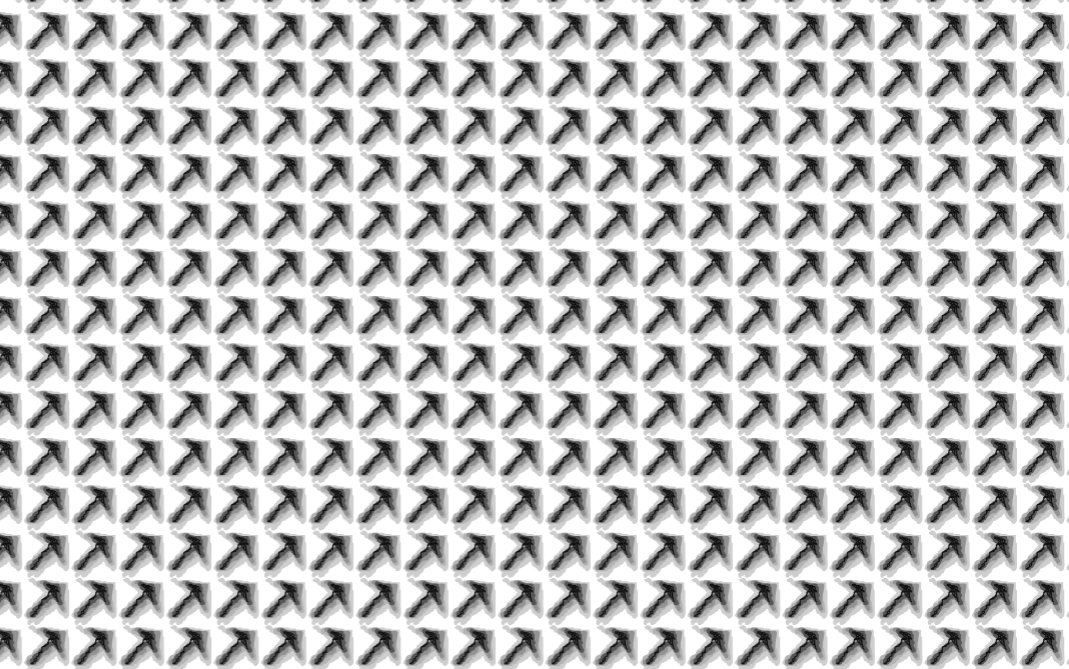

In [3]:
img = Image.open('images/C1gradientArrows.png')
img = img.convert('L')
display(img)

largest 7 lengths of H1 intervals
[10825.44189453125, 9801.51806640625, 4200.68701171875, 3935.244140625, 3650.0341796875, 3462.0859375, 3341.42822265625]


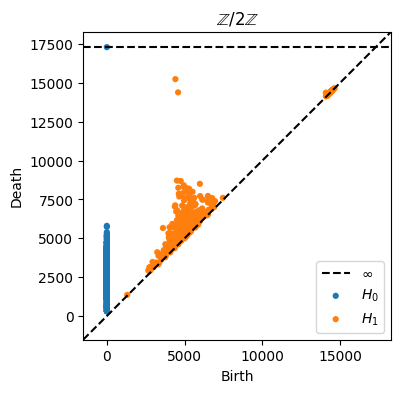

In [4]:
persistent_homology(img, 160, 1000, 2)

largest 7 lengths of H1 intervals
[10731.24755859375, 9570.48486328125, 4617.81494140625, 4292.97216796875, 4016.92236328125, 3947.7373046875, 3694.83837890625]


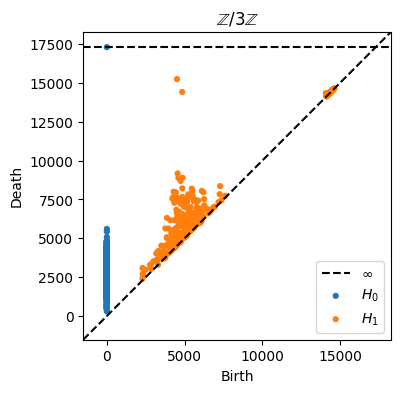

In [5]:
persistent_homology(img, 160, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!

## Point Group: $C_2$

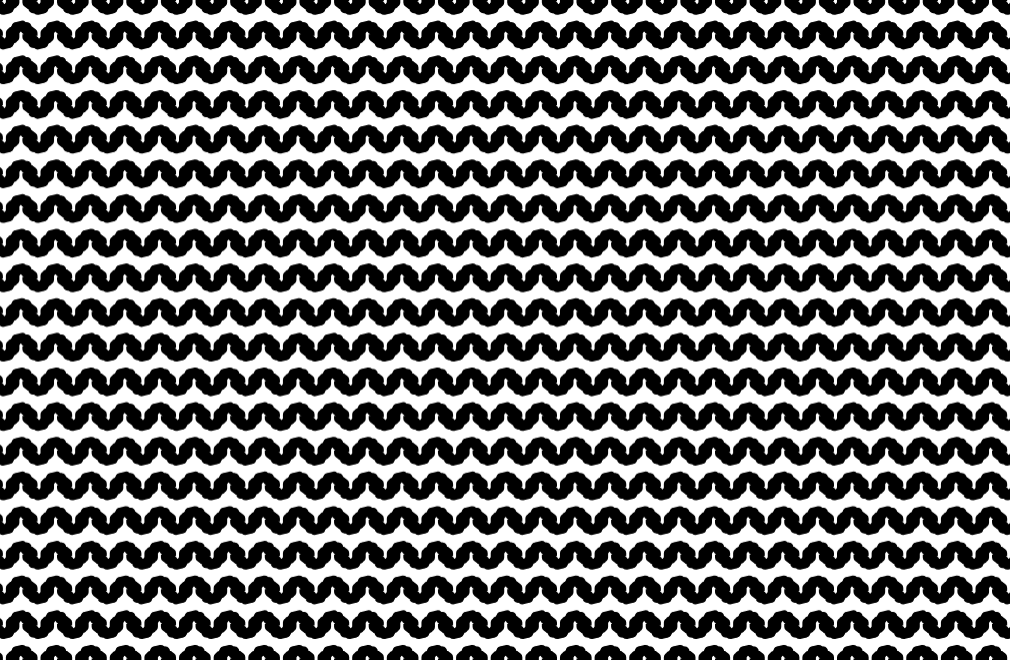

In [6]:
img = Image.open('images/C2sqiggle.png')
img = img.convert('L')
display(img)

largest 7 lengths of H1 intervals
[19656.173828125, 15301.3896484375, 7305.322265625, 7058.1015625, 5860.7578125, 5740.4443359375, 5539.47265625]


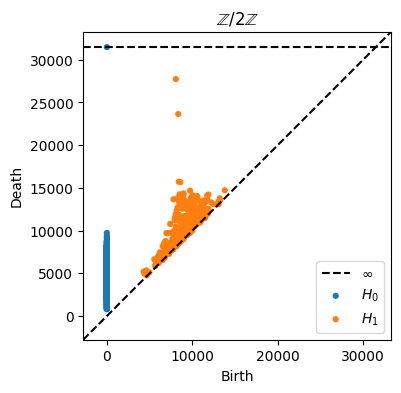

In [7]:
persistent_homology(img, 160, 1000, 2)

largest 7 lengths of H1 intervals
[19151.951171875, 15661.330078125, 6939.974609375, 6744.65625, 6661.861328125, 6354.0078125, 6148.9296875]


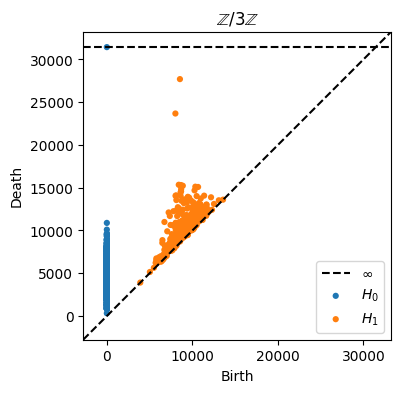

In [8]:
persistent_homology(img, 160, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!

## Point Group: $C_3$

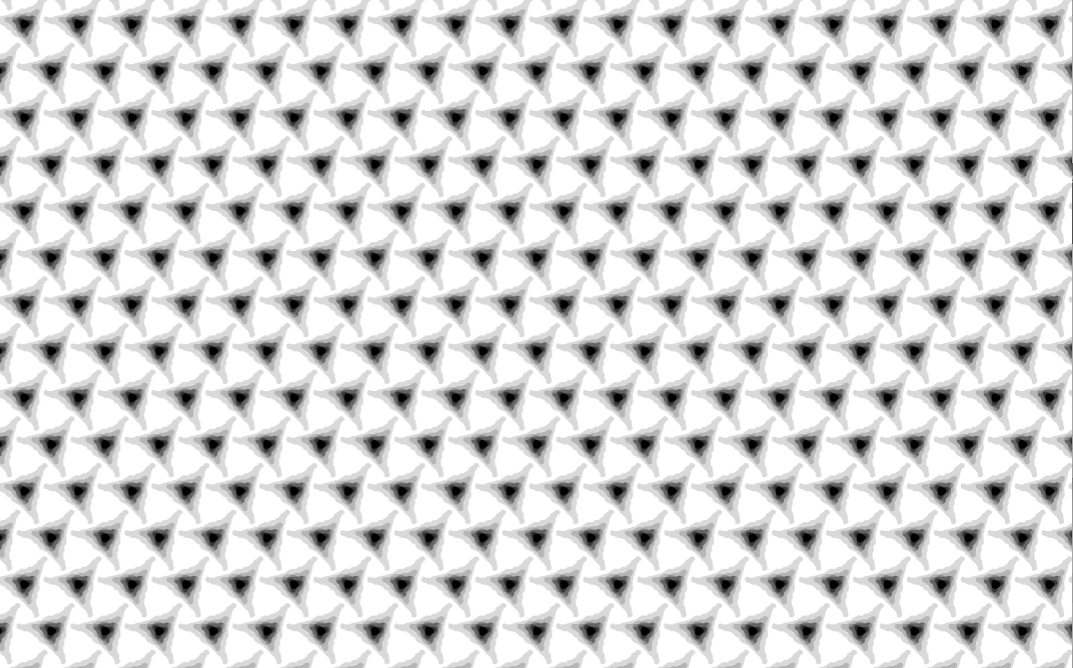

In [9]:
img = Image.open('images/C3gradient.png')
img = img.convert('L')
display(img)

largest 7 lengths of H1 intervals
[10577.241455078125, 9966.20849609375, 3349.45654296875, 3017.313720703125, 2878.6513671875, 2487.653564453125, 2386.6728515625]


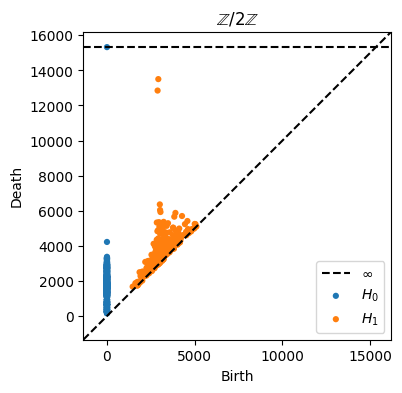

In [10]:
persistent_homology(img, 160, 1000, 2)

largest 7 lengths of H1 intervals
[10652.1962890625, 9934.452880859375, 2782.861083984375, 2696.552001953125, 2629.361083984375, 2623.349609375, 2577.788330078125]


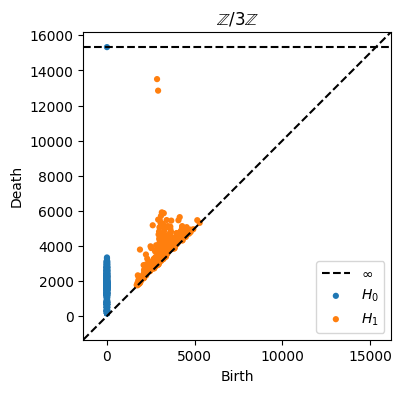

In [11]:
persistent_homology(img, 160, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!

## Point Group: $C_4$

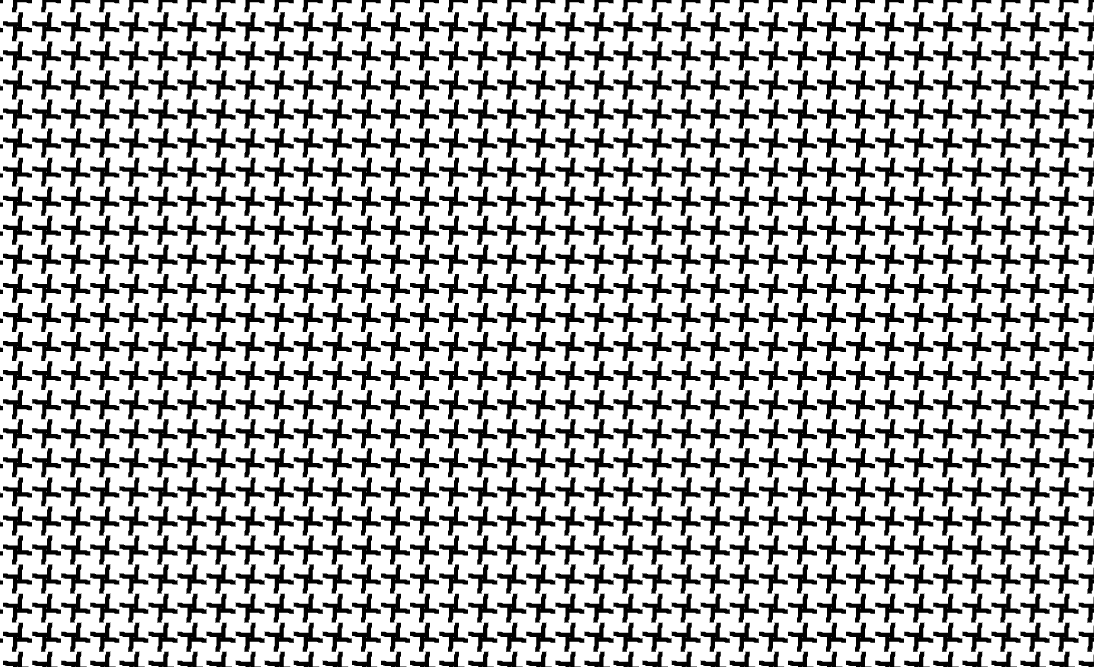

In [12]:
img = Image.open('images/C4pinwheel.png')
img = img.convert('L')
display(img)

largest 7 lengths of H1 intervals
[5073.781982421875, 4885.928466796875, 2946.146728515625, 2802.028076171875, 2775.879150390625, 2729.036865234375, 2651.9560546875]


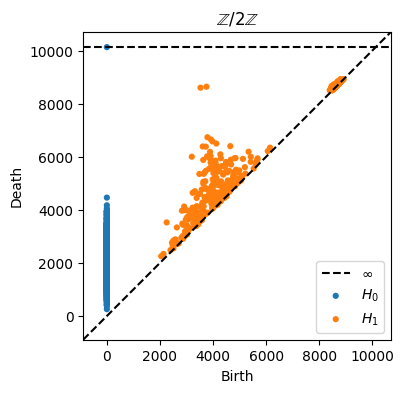

In [13]:
persistent_homology(img, 60, 1000, 2)

largest 7 lengths of H1 intervals
[4954.3876953125, 4761.246826171875, 2856.253173828125, 2543.379150390625, 2521.249755859375, 2443.65283203125, 2376.966796875]


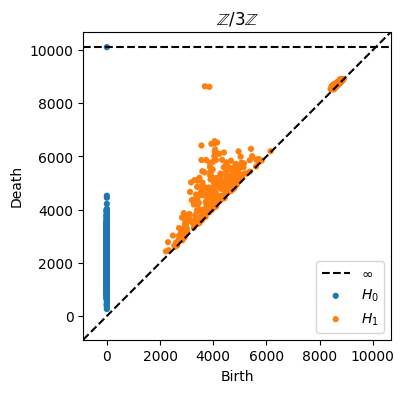

In [14]:
persistent_homology(img, 60, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!

## Point Group: $C_6$

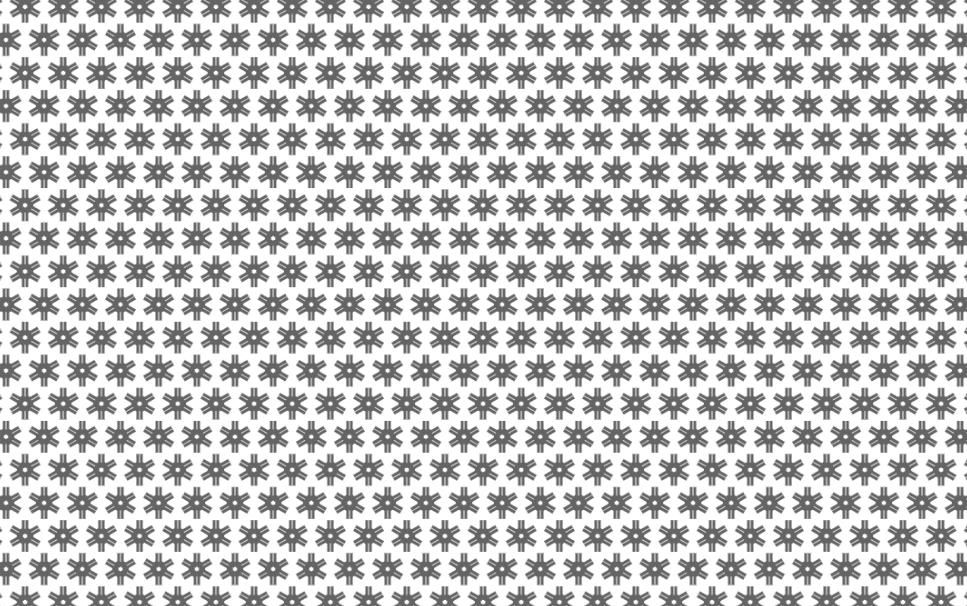

In [15]:
img = Image.open('images/C6 star.png')
img = img.convert('L')
display(img)

largest 7 lengths of H1 intervals
[3002.41943359375, 2709.114990234375, 1493.866455078125, 1394.234375, 1311.8955078125, 1302.6943359375, 1275.697021484375]


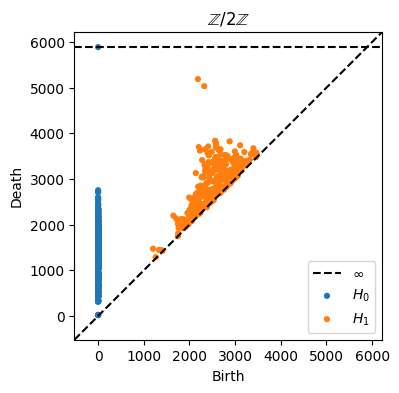

In [16]:
persistent_homology(img, 60, 1000, 2)

largest 7 lengths of H1 intervals
[2899.9599609375, 2707.4296875, 1641.49365234375, 1392.211181640625, 1385.528564453125, 1361.66357421875, 1359.1279296875]


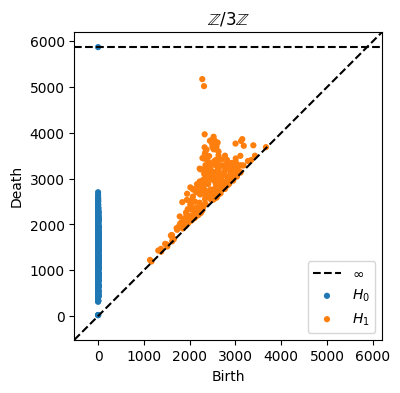

In [17]:
persistent_homology(img, 60, 1000, 3)

As expected, these results indicate that there are two $H_1$ homology classes over $Z_2$ and $Z_3$!

## An image that is not wallpaper-symmetric

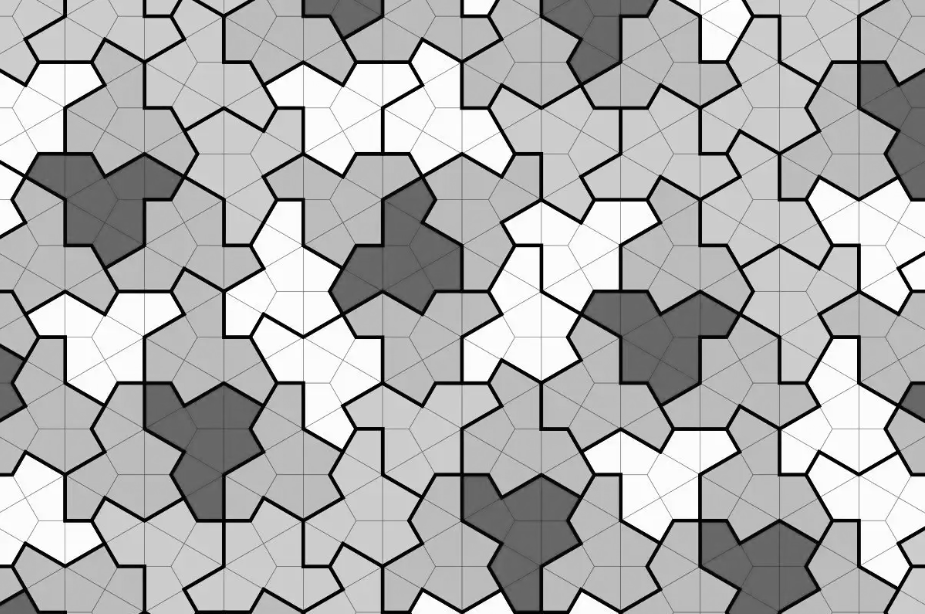

In [18]:
img = Image.open('images/aperiodic.png')
img = img.convert('L')
display(img)

largest 7 lengths of H1 intervals
[2411.1123046875, 2120.33203125, 2082.900390625, 2047.1513671875, 1932.267578125, 1862.9580078125, 1851.439453125]


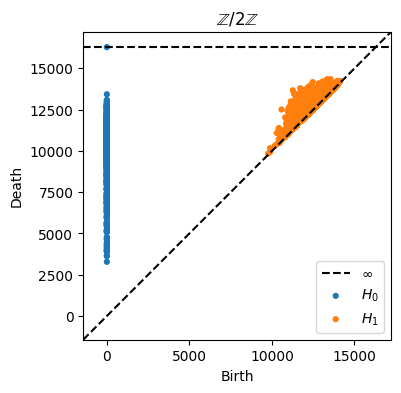

In [20]:
persistent_homology(img, 160, 1000, 2)

largest 7 lengths of H1 intervals
[2226.115234375, 2173.9404296875, 2154.3798828125, 2134.2001953125, 2056.826171875, 1963.13671875, 1936.5595703125]


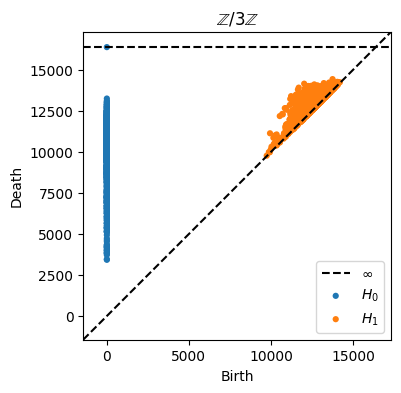

In [21]:
persistent_homology(img, 160, 1000, 3)

As expected, there are no translational cycles in the image, so the persistent homology is just noise. 